In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict

from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve

In [65]:
df_true = pd.read_csv("LabeledAuthentic-7K.csv")
df_false = pd.read_csv("LabeledFake-1K.csv")

In [66]:
df_true.head(2)

,articleID,domain,date,category,source,relation,headline,content,label
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0


In [67]:
df_false.head(2)

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire


In [68]:
df_true.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label'],
      dtype='object')

In [69]:
drop_col=['articleID', 'domain', 'date', 'category', 'source', 'relation']
df_true=df_true.drop(['articleID', 'domain', 'date', 'category', 'source', 'relation'],axis='columns')

In [70]:
df_false.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

In [71]:
df_false=df_false.drop(['articleID', 'domain', 'date', 'category', 'source', 'relation','F-type'],axis='columns')

In [72]:
df_false

,headline,content,label
0,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...
1294,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


# Distribution of Fake News and Real News

Text(0, 0.5, 'Proportion of News Articles')

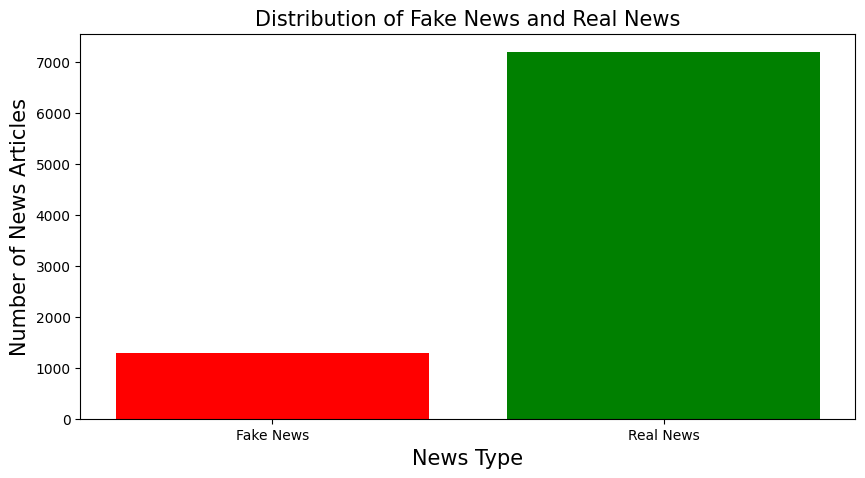

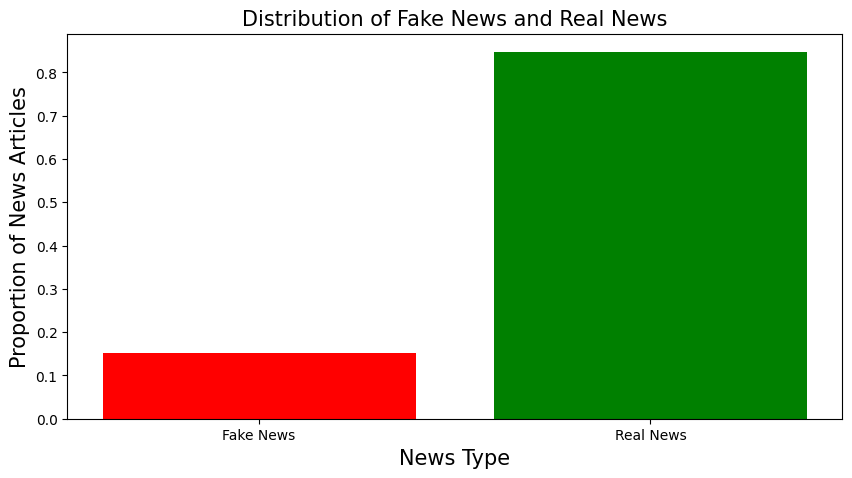

In [73]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_false), color='red')
plt.bar('Real News', len(df_true), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Number of News Articles', size=15)


total_len = len(df_false) + len(df_true)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_false) / total_len, color='red')
plt.bar('Real News', len(df_true) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [74]:
ban_df=pd.concat([df_true,df_false],axis=0)

In [75]:
ban_df.head(3)

,headline,content,label
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0


In [76]:
ban_df.shape

(8501, 3)

In [77]:
ban_df.isnull().sum()

headline    0
content     0
label       0
dtype: int64

In [78]:
ban_df.duplicated().sum()

0

In [79]:
ban_df['Content'] = ban_df['headline'] + ban_df['content']

In [80]:
ban_df.head()

,headline,content,label,Content
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...
3,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'..."


In [81]:
ban_df1=ban_df.drop(['headline','content'],axis='columns')

In [82]:
ban_df.head()

,headline,content,label,Content
0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...
3,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'..."


In [83]:
ban_df1.head()

,label,Content
0,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,1.0,রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...
3,1.0,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4,1.0,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'..."


In [84]:
ban_df2=ban_df.drop(['headline','content'],axis='columns')

# Creating a function to convert the text in lowercase, remove the extra space, special characeters, url and links

In [85]:
def wordopt(Content):
    Content = Content.lower()
    Content = re.sub('\[.*?\]','',Content)
    # Content = re.sub("\\W", " ", Content)
    Content = re.sub('https?://\S+|wwww\.\S+','',Content)
    Content = re.sub('<.*?>+', '' ,Content)
    Content = re.sub('[%s]' % re.escape(string.punctuation), '', Content)
    Content = re.sub('\n','',Content)
    Content = re.sub('\w*\d\w*','',Content)
    return Content


In [86]:
ban_df1['Content']=ban_df1['Content'].apply(wordopt)

In [87]:
ban_df1

,label,Content
0,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,1.0,রাজধানীতে বিশেষ অভিযানে আটক াজধানীতে মাদক বিরো...
3,1.0,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4,1.0,যেখানে তেল আসত দিনে এখন তা আসবে অতি দ্রুতভারত...
...,...,...
1294,0.0,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...
1295,0.0,ias ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...
1296,0.0,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যুশাওমি...
1297,0.0,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...


## Tokenize

In [88]:
def tokenize_bangla(text):
    # Define characters to be treated as separators (you can add more if needed)
    separators = [' ', ',', '.', '!', '?', '...', '—', '(', ')', '[', ']', '{', '}', ':', ';']

    # Initialize variables
    current_word = ""
    tokens = []

    # Iterate through each character in the text
    for char in text:
        # If the character is a separator, add the current word to the tokens list
        if char in separators:
            if current_word:
                tokens.append(current_word)
                current_word = ""
        else:
            # Build the current word character by character
            current_word += char

    # Add the last word if not added yet
    if current_word:
        tokens.append(current_word)

    return tokens

In [89]:
 ban_df1['Content']=ban_df1['Content'].apply(tokenize_bangla)

# Stop Word remove

In [90]:
def remove_stopwords_bangla(text):
    stopwords_list = ["অতএব", "অথচ", "অথবা", "অনুযায়ী", "অনেক", "অনেকে",
                      "অনেকেই", "অন্তত", "অন্য", "অবধি", "অবশ্য", "অর্থাত", "আই",
                      "আগামী", "আগে", "আগেই", "আছে", "আজ", "আদ্যভাগে", "আপনার",
                      "আপনি", "আবার", "আমরা", "আমাকে", "আমাদের", "আমার", "আমি", "আর",
                      "আরও", "ই", "ইত্যাদি", "ইহা", "উচিত", "উত্তর", "উনি", "উপর", "উপরে", "এ",
                      "এঁদের", "এঁরা", "এই", "একই", "একটি", "একবার", "একে", "এক্", "এখন", "এখনও",
                      "এখানে", "এখানেই", "এটা", "এটাই", "এটি", "এত", "এতটাই", "এতে", "এদের", "এব",
                      "এবং", "এবার", "এমন", "এমনকী", "এমনি", "এর", "এরা", "এল", "এস", "এসে", "ঐ",
                      "ও", "ওঁদের", "ওঁর", "ওঁরা", "ওই", "ওকে", "ওখানে", "ওদের", "ওর", "ওরা", "কখনও", "কত", "কবে",
                      "কমনে", "কয়েক", "কয়েকটি", "করছে", "করছেন", "করতে", "করবে", "করবেন", "করলে", "করলেন", "করা", "করাই",
                      "করায়", "করার", "করি", "করিতে", "করিয়া", "করিয়ে", "করে", "করেই", "করেছিলেন", "করেছে", "করেছেন", "করেন", "কাউকে",
                      "কাছ", "কাছে", "কাজ", "কাজে", "কারও", "কারণ", "কি", "কিংবা", "কিছু", "কিছুই", "কিন্তু", "কী", "কে", "কেউ", "কেউই", "কেখা", "কেন", "কোটি", "কোন", "কোনও", "কোনো",
                      "ক্ষেত্রে", "কয়েক", "খুব", "গিয়ে", "গিয়েছে", "গিয়ে", "গুলি", "গেছে", "গেল", "গেলে", "গোটা", "চলে", "চান", "চায়", "চার", "চালু", "চেয়ে", "চেষ্টা", "ছাড়া", "ছাড়াও", "ছিল", "ছিলেন", "জন", "জনকে", "জনের", "জন্য", "জন্যওজে", "জানতে", "জানা", "জানানো", "জানায়", "জানিয়ে", "জানিয়েছে", "জে", "জ্নজন", "টি", "ঠিক", "তখন", "তত",
                      "তথা", "তবু", "তবে", "তা", "তাঁকে", "তাঁদের", "তাঁর", "তাঁরা", "তাঁাহারা", "তাই", "তাও", "তাকে", "তাতে", "তাদের", "তার", "তারপর", "তারা", "তারৈ", "তাহলে", "তাহা", "তাহাতে", "তাহার", "তিনঐ", "তিনি", "তিনিও", "তুমি", "তুলে", "তেমন", "তো",
                      "তোমার", "থাকবে", "থাকবেন", "থাকা", "থাকায়", "থাকে", "থাকেন", "থেকে", "থেকেই", "থেকেও", "দিকে", "দিতে", "দিন", "দিয়ে", "দিয়েছে", "দিয়েছেন", "দিলেন", "দু", "দুই", "দুটি", "দুটো", "দেওয়া", "দেওয়ার", "দেওয়া", "দেখতে", "দেখা", "দেখে", "দেন", "দেয়", "দ্বারা", "ধরা", "ধরে", "ধামার", "নতুন", "নয়", "না", "নাই", "নাকি", "নাগাদ", "নানা", "নিজে", "নিজেই",
                      "নিজেদের", "নিজের", "নিতে", "নিয়ে", "নিয়ে", "নেই", "নেওয়া", "নেওয়ার", "নেওয়া", "নয়", "পক্ষে", "পর", "পরে", "পরেই", "পরেও", "পর্যন্ত", "পাওয়া", "পাচ", "পারি", "পারে", "পারেন", "পি", "পেয়ে", "পেয়্র্", "প্রতি", "প্রথম", "প্রভৃতি", "প্রযন্ত", "প্রাথমিক", "প্রায়", "প্রায়", "ফলে", "ফিরে", "ফের", "বক্তব্য", "বদলে", "বন", "বরং", "বলতে", "বলল", "বললেন", "বলা", "বলে", "বলেছেন",
                      "বলেন", "বসে", "বহু", "বা", "বাদে", "বার", "বি", "বিনা", "বিভিন্ন", "বিশেষ", "বিষয়টি", "বেশ", "বেশি", "ব্যবহার", "ব্যাপারে", "ভাবে", "ভাবেই", "মতো", "মতোই", "মধ্যভাগে", "মধ্যে", "মধ্যেই", "মধ্যেও", "মনে", "মাত্র", "মাধ্যমে", "মোট", "মোটেই", "যখন", "যত", "যতটা", "যথেষ্ট", "যদি", "যদিও", "যা", "যাঁর", "যাঁরা", "যাওয়া", "যাওয়ার", "যাওয়া", "যাকে", "যাচ্ছে", "যাতে", "যাদের", "যান",
                      "যাবে", "যায়", "যার", "যারা", "যিনি", "যে", "যেখানে", "যেতে", "যেন", "যেমন", "র", "রকম", "রয়েছে", "রাখা", "রেখে", "লক্ষ", "শুধু", "শুরু", "সঙ্গে", "সঙ্গেও", "সব", "সবার", "সমস্ত", "সম্প্রতি", "সহ", "সহিত", "সাধারণ", "সামনে", "সি", "সুতরাং", "সে", "সেই", "সেখান", "সেখানে", "সেটা", "সেটাই", "সেটাও", "সেটি", "স্পষ্ট", "স্বয়ং", "হইতে", "হইবে", "হইয়া", "হওয়া", "হওয়ায়", "হওয়ার", "হচ্ছে", "হত", "হতে",
                      "হতেই", "হন", "হবে", "হবেন", "হয়", "হয়তো", "হয়নি", "হয়ে", "হয়েই", "হয়েছিল", "হয়েছে", "হয়েছেন", "হল", "হলে", "হলেই",
                      "হলেও", "হলো", "হাজার", "হিসাবে", "হৈলে", "হোক", "হয়"]
                      
    if isinstance(text, list):  # Check if text is a list
        text = ' '.join(text)  # Convert list to string
        
    words = text.split()  # Tokenize the text into words
    
    filtered_words = [word for word in words if word not in stopwords_list]  # Remove stopwords
    
    processed_text = ' '.join(filtered_words)  # Join the filtered words
    
    return processed_text

In [91]:
ban_df1['Content'] = ban_df1['Content'].apply(remove_stopwords_bangla);

In [92]:
ban_df1['Content']

0       হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1       টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2       রাজধানীতে অভিযানে আটক াজধানীতে মাদক বিরোধী অভি...
3       উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ মাধ্যমেসন...
4       তেল আসত দিনে আসবে অতি দ্রুতভারত পাইপ লাইনের সর...
                              ...                        
1294    রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের স্ত্রী হ...
1295    ias ইন্টারভিউ মেয়েটিকে জিজ্ঞসা মেয়েদের অঙ্গ বে...
1296    শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যুশাওমি...
1297    ফেসবুকে যেভাবে মন্ত্রীদের অভিনন্দন বার্তা জানা...
1298    মাঝ আকাশে পর্ন দেখার অভিযোগে পাইলট আটকবিমান আক...
Name: Content, Length: 8501, dtype: object

In [93]:
ban_df1

,label,Content
0,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,1.0,রাজধানীতে অভিযানে আটক াজধানীতে মাদক বিরোধী অভি...
3,1.0,উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ মাধ্যমেসন...
4,1.0,তেল আসত দিনে আসবে অতি দ্রুতভারত পাইপ লাইনের সর...
...,...,...
1294,0.0,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের স্ত্রী হ...
1295,0.0,ias ইন্টারভিউ মেয়েটিকে জিজ্ঞসা মেয়েদের অঙ্গ বে...
1296,0.0,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যুশাওমি...
1297,0.0,ফেসবুকে যেভাবে মন্ত্রীদের অভিনন্দন বার্তা জানা...


In [94]:
#turn on internet option in kernel
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer

def Stemming(text):

    x=str(text)
    l=x.split()

    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(l)

    out=' '.join(stm)

    return out

Defaulting to user installation because normal site-packages is not writeable


In [95]:
 # ban_df1['Content'] = ban_df1['Content'].apply(Stemming);

In [96]:
ban_df1

,label,Content
0,1.0,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...
1,1.0,টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...
2,1.0,রাজধানীতে অভিযানে আটক াজধানীতে মাদক বিরোধী অভি...
3,1.0,উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ মাধ্যমেসন...
4,1.0,তেল আসত দিনে আসবে অতি দ্রুতভারত পাইপ লাইনের সর...
...,...,...
1294,0.0,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের স্ত্রী হ...
1295,0.0,ias ইন্টারভিউ মেয়েটিকে জিজ্ঞসা মেয়েদের অঙ্গ বে...
1296,0.0,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যুশাওমি...
1297,0.0,ফেসবুকে যেভাবে মন্ত্রীদের অভিনন্দন বার্তা জানা...


# Random Shuffling the dataframe

In [97]:

ban_df1 = ban_df1.sample(frac = 1)


# create X , y

In [98]:
X= ban_df1['Content']
y=ban_df1['label']

# Feature extraction

## train

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
Tf_Idf = TfidfVectorizer()
X=Tf_Idf.fit_transform(X)

In [101]:
X.shape

(8501, 12850)

# train test split

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=121, stratify=y)

# Logistic Regression

In [103]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [104]:

y_p_train=LR.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test1 = LR.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test1))
print("Classification Report:")
print(classification_report(y_test, y_pred_test1))

Tranning Accuracy: 0.9502941176470588
Test Accuracy: 0.9300411522633745
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       260
         1.0       0.93      0.99      0.96      1441

    accuracy                           0.93      1701
   macro avg       0.93      0.79      0.84      1701
weighted avg       0.93      0.93      0.92      1701



Precision Score : 0.9292207792207792
Recall Score : 0.993060374739764
f1 Score : 0.960080509896008


confusion matrix


[[ 151  109]
 [  10 1431]]




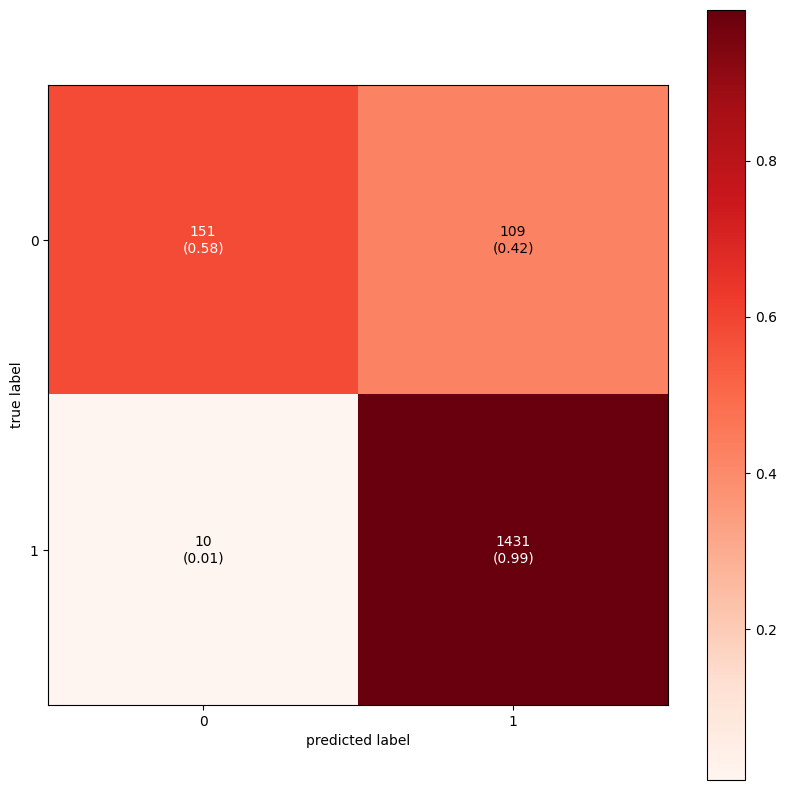

In [105]:
precision_score_LR=precision_score(y_test,y_pred_test1)
recall_score_LR=recall_score(y_test,y_pred_test1)
f1_score_LR=f1_score(y_test,y_pred_test1)

print("Precision Score :",precision_score_LR)
print("Recall Score :",recall_score_LR)
print("f1 Score :",f1_score_LR)

print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_test1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')
plt.show()

In [106]:
fpr_lr,tpr_lr,th_lr=roc_curve(y_test,y_pred_test1)
fpr_lr,tpr_lr,th_lr

(array([0.        , 0.41923077, 1.        ]),
 array([0.        , 0.99306037, 1.        ]),
 array([inf,  1.,  0.]))

plot roc_curve

# Random Forest

In [107]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [108]:
y_pred_test2 = Rando.predict(X_test)
y_p_train=Rando.predict(X_train);
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test2))
print(" tranning Accuracy:", accuracy_score(y_train, y_p_train))

print("Classification Report:")
print(classification_report(y_test, y_pred_test2))

Testing Accuracy: 0.9288653733098178
 tranning Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.70       260
         1.0       0.92      1.00      0.96      1441

    accuracy                           0.93      1701
   macro avg       0.96      0.77      0.83      1701
weighted avg       0.93      0.93      0.92      1701



Precision Score : 0.9225352112676056
Recall Score : 1.0
f1 Score : 0.9597069597069597
[[ 139  121]
 [   0 1441]]




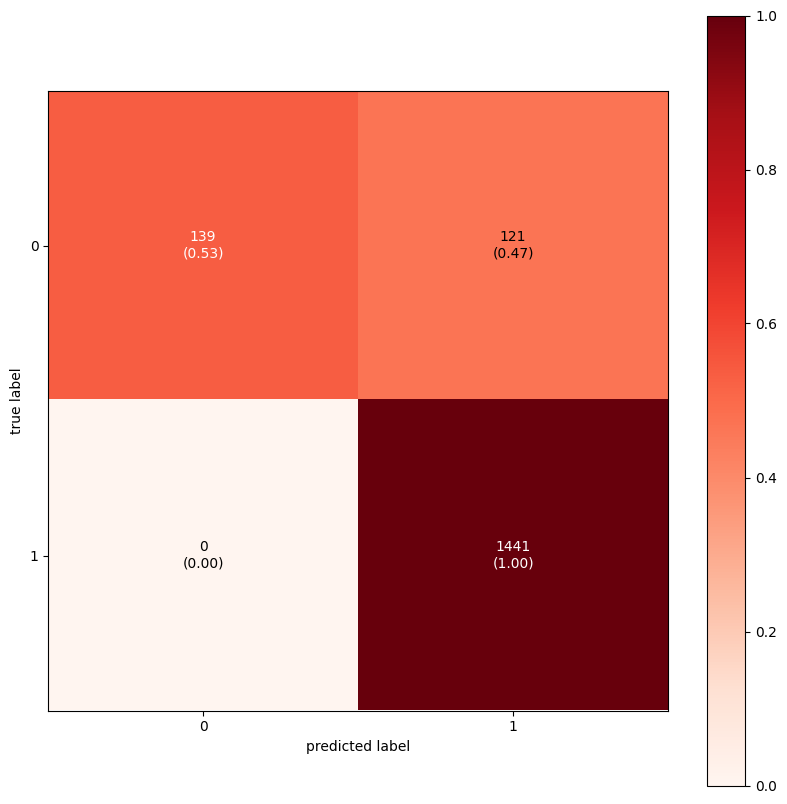

In [109]:
precision_score_Rf=precision_score(y_test,y_pred_test2)
recall_score_Rf=recall_score(y_test,y_pred_test2)
f1_score_Rf=f1_score(y_test,y_pred_test2)

print("Precision Score :", precision_score_Rf)
print("Recall Score :",recall_score_Rf)
print("f1 Score :",f1_score_Rf)

CR=confusion_matrix(y_test, y_pred_test2)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

In [110]:
fpr_rf,tpr_rf,th_rf=roc_curve(y_test,y_pred_test2)
fpr_rf,tpr_rf,th_rf

(array([0.        , 0.46538462, 1.        ]),
 array([0., 1., 1.]),
 array([inf,  1.,  0.]))

# Support vector machine

In [111]:
from sklearn.svm import SVC


svm_clf=SVC(kernel='rbf', C=2, gamma=1);
svm_clf.fit(X_train,y_train);


In [112]:
y_p_train=svm_clf.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))
y_pred_test3 = svm_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test3))
print("Classification Report:")
print(classification_report(y_test, y_pred_test3))

Tranning Accuracy: 0.9991176470588236
Test Accuracy: 0.951793062904174
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82       260
         1.0       0.95      0.99      0.97      1441

    accuracy                           0.95      1701
   macro avg       0.95      0.86      0.90      1701
weighted avg       0.95      0.95      0.95      1701



Precision Score : 0.9533022014676451
Recall Score : 0.9916724496877168
f1 Score : 0.972108843537415
[[ 190   70]
 [  12 1429]]




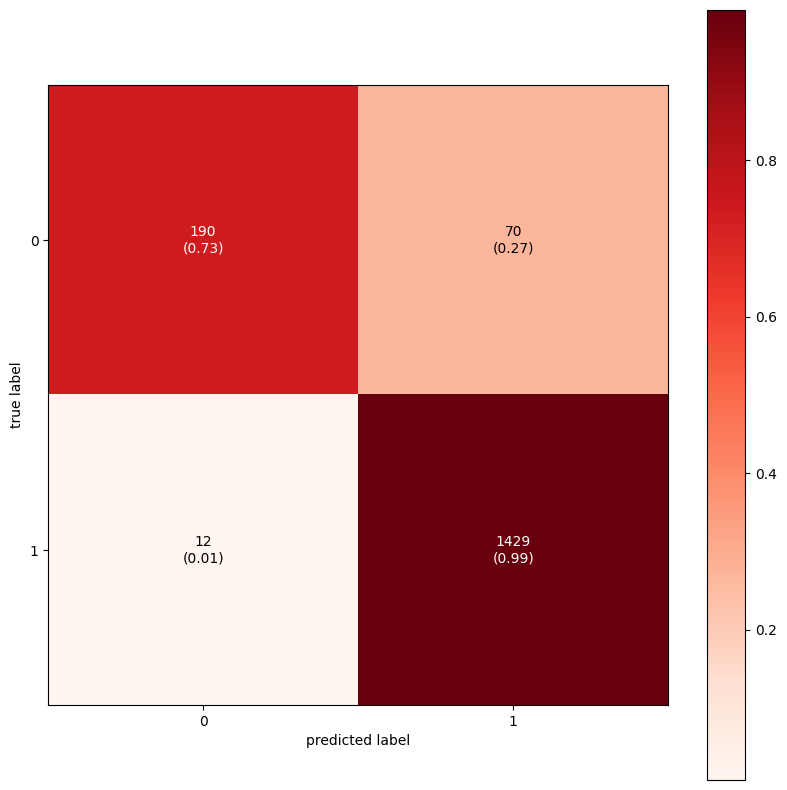

In [113]:
precision_score_sv=precision_score(y_test,y_pred_test3)
recall_score_sv=recall_score(y_test,y_pred_test3)
f1_score_sv=f1_score(y_test,y_pred_test3)

print("Precision Score :",precision_score_sv)
print("Recall Score :",recall_score_sv)
print("f1 Score :",f1_score_sv)

fpr_sv,tpr_sv,th_sv=roc_curve(y_test,y_pred_test3)
fpr_sv,tpr_sv,th_sv

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test3)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

### best kernel ,c and gamma

In [114]:
# C_values = [0.1, 1, 10,100]
# gamma_values = [0.01, 0.1, 1]
# kernel=["linear","rbf","poly","sigmoid"]

# best_accuracy = 0
# best_params = {}

# # Iterate through all combinations of C and gamma and kernel
# for C in C_values:
#     for gamma in gamma_values:
#         for K in kernel:
#             svm_rbf = SVC(kernel=K, C=C, gamma=gamma)
#             svm_rbf.fit(X_train,y_train )
#             y_pred = svm_rbf.predict(X_test)
#             accuracy = accuracy_score(y_test, y_pred)

#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_params = {'kernel':K,'C': C, 'gamma': gamma}

# # Create model using the best hyperparameters
# best_model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
# best_model.fit(X_train,y_train)

# y_pred_best = best_model.predict(X_test)
# test_accuracy_best = accuracy_score(y_test, y_pred_best)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy (Best Model):", test_accuracy_best)

# matrix=classification_report(y_test,y_pred_best)
# print("\n\nClassification Report\n",matrix)

# decision Tree

In [115]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_p_train=dt.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test4 = dt.predict(X_test)
print("Test  Accuracy:", accuracy_score(y_test, y_pred_test4))

print("Classification Report:")
print(classification_report(y_test, y_pred_test4))

Tranning Accuracy: 1.0
Test  Accuracy: 0.9194591416813639
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73       260
         1.0       0.95      0.96      0.95      1441

    accuracy                           0.92      1701
   macro avg       0.85      0.83      0.84      1701
weighted avg       0.92      0.92      0.92      1701



Precision Score : 0.9471879286694102
Recall Score : 0.9583622484385843
f1 Score : 0.9527423249396344
[[ 183   77]
 [  60 1381]]




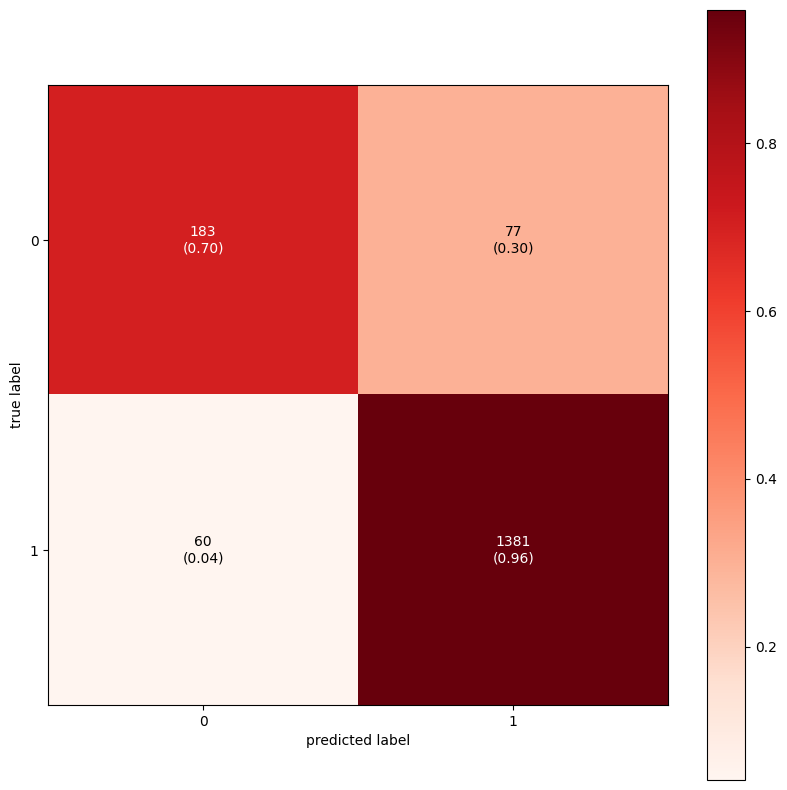

In [116]:
precision_score_dt=precision_score(y_test,y_pred_test4)
recall_score_dt=recall_score(y_test,y_pred_test4)
f1_score_dt=f1_score(y_test,y_pred_test4)

print("Precision Score :",precision_score_dt)
print("Recall Score :",recall_score_dt)
print("f1 Score :",f1_score_dt)

fpr_dt,tpr_dt,th_dt=roc_curve(y_test,y_pred_test4)
fpr_dt,tpr_dt,th_dt

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test4)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

## AdaBoostingClassifiers

In [117]:

# svm_classifier = SVC()  # You can adjust kernel and C parameter as per your requirement
# # Initialize the AdaBoost classifier with SVM as the base estimator and SAMME algorithm
# Adab = AdaBoostClassifier(base_estimator=svm_classifier, n_estimators=5, algorithm='SAMME', random_state=1)


Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=5, random_state=1)

In [118]:
y_p_train=Adab.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test6 = Adab.predict(X_test)
print("testing Accuracy:", accuracy_score(y_test, y_pred_test6))

print("Classification Report:")
print(classification_report(y_test, y_pred_test6))

Tranning Accuracy: 0.9960294117647058
testing Accuracy: 0.9000587889476779
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       260
         1.0       0.93      0.95      0.94      1441

    accuracy                           0.90      1701
   macro avg       0.81      0.78      0.80      1701
weighted avg       0.90      0.90      0.90      1701



Precision Score : 0.9308474576271186
Recall Score : 0.9528105482303956
f1 Score : 0.9417009602194788
[[ 158  102]
 [  68 1373]]




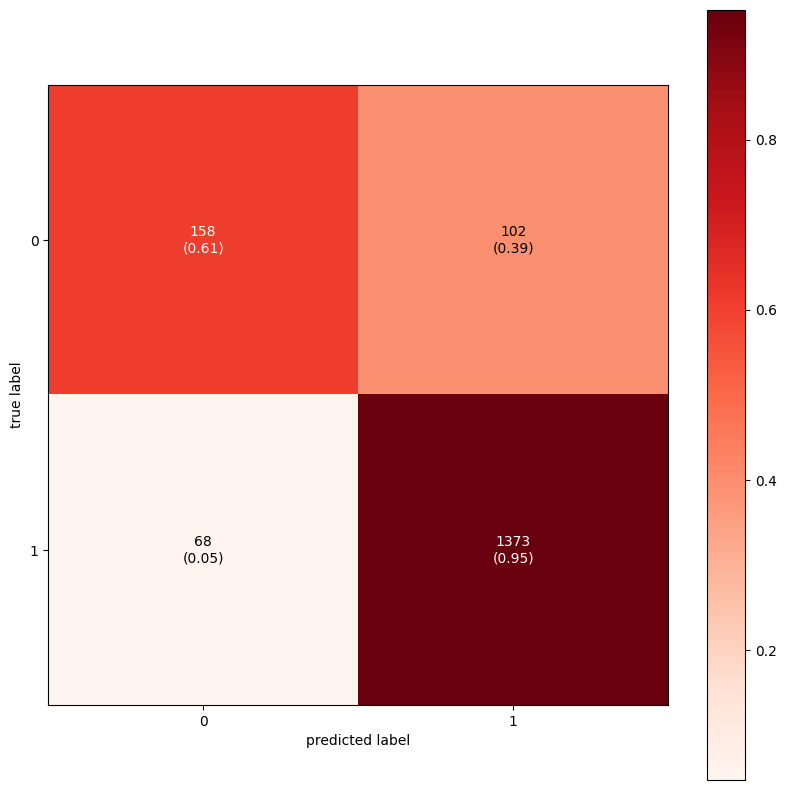

In [119]:
precision_score_Ad=precision_score(y_test,y_pred_test6)
recall_score_Ad=recall_score(y_test,y_pred_test6)
f1_score_Ad=f1_score(y_test,y_pred_test6)

print("Precision Score :",precision_score_Ad)
print("Recall Score :",recall_score_Ad)
print("f1 Score :",f1_score_Ad)

fpr_Ad,tpr_Ad,th_Ad=roc_curve(y_test,y_pred_test6)
fpr_Ad,tpr_Ad,th_Ad


#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test6)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

## GradientBoostingClassifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(max_depth=10,n_estimators=10, learning_rate=1.0,random_state=1)
GB_clf.fit(X_train, y_train)

y_p_train=GB_clf.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test5 = GB_clf.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test5))
print("Classification Report:")
print(classification_report(y_test, y_pred_test5))

Tranning Accuracy: 0.9797058823529412
Testing Accuracy: 0.9153439153439153
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.63      0.69       260
         1.0       0.94      0.97      0.95      1441

    accuracy                           0.92      1701
   macro avg       0.85      0.80      0.82      1701
weighted avg       0.91      0.92      0.91      1701



Precision Score : 0.9355271994627267
Recall Score : 0.9666897987508675
f1 Score : 0.9508532423208191
[[ 164   96]
 [  48 1393]]




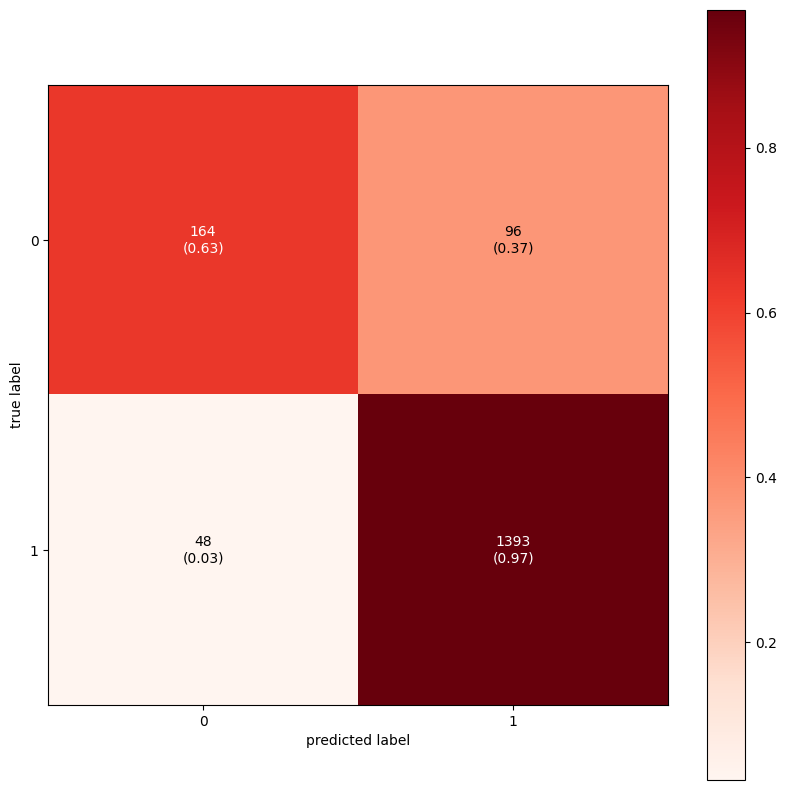

In [121]:
precision_score_gb=precision_score(y_test,y_pred_test5)
recall_score_gb=recall_score(y_test,y_pred_test5)
f1_score_gb=f1_score(y_test,y_pred_test5)

print("Precision Score :",precision_score_gb)
print("Recall Score :",recall_score_gb)
print("f1 Score :",f1_score_gb)

fpr_gb,tpr_gb,th_gb=roc_curve(y_test,y_pred_test5)
fpr_gb,tpr_gb,th_gb

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test5)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

##  ROC

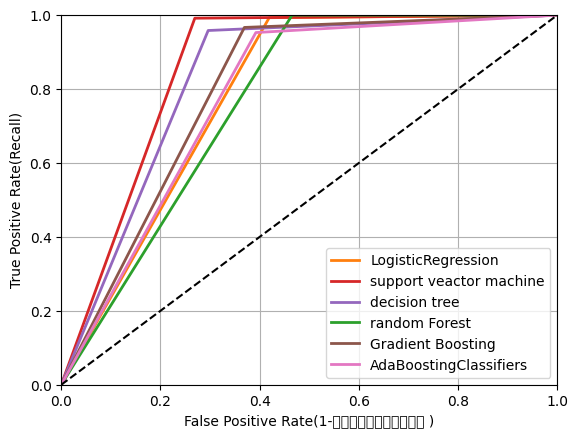

In [122]:
#logistic regression
plt.plot(fpr_lr,tpr_lr,label='LogisticRegression' ,
         linewidth=2, color='C1')

#support vactor machine
plt.plot(fpr_sv,tpr_sv,label='support veactor machine' ,
         linewidth=2, color='C3')

#Decision Tree
plt.plot(fpr_dt,tpr_dt,label='decision tree' ,
         linewidth=2, color='C4')

#random forest
plt.plot(fpr_rf,tpr_rf,label='random Forest',
         linewidth=2, color='C2')


#GradientBoosting
plt.plot(fpr_gb,tpr_gb,label='Gradient Boosting',
         linewidth=2, color='C5')
# #ada boost
plt.plot(fpr_Ad,tpr_Ad,label='AdaBoostingClassifiers' ,
         linewidth=2, color='C6')

plt.plot([0,1],[0,1],'k--')
plt.axis([0, 1, 0, 1])
plt.ylabel('True Positive Rate(Recall)')
plt.xlabel('False Positive Rate(1-𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 )')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()